In [68]:
from matplotlib.pyplot import *
from numpy import *
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors


In [69]:
g = 9.8     
dt = 0.01    # time step = 1/10 second 
N = 100     # 100 points in the answer array
c2 = 0.0013
m = 0.145  
t = np.arange(0,10,dt)
x = np.zeros(len(t))
v = np.zeros(len(t))
a = np.zeros(len(t))
x[0] = 100
v[0] = 0
a[0] = -g

In [70]:
for i in range(1, len(t)) :
    a[i] = -g + (c2/m)*v[i-1]**2
    v[i] = v[i-1] + a[i-1]*dt
    x[i] = x[i-1]+ v[i-1]*dt

In [71]:
c2 = 0;
t = np.arange(0,10,dt)
x1 = np.zeros(len(t))
v1 = np.zeros(len(t))
a1 = np.zeros(len(t))
x1[0] = 100
v1[0] = 0
a1[0] = -g
for i in range(1, len(t)) :
    a1[i] = -g + (c2/m)*v1[i-1]**2
    v1[i] = v1[i-1] + a1[i-1]*dt
    x1[i] = x1[i-1]+ v1[i-1]*dt

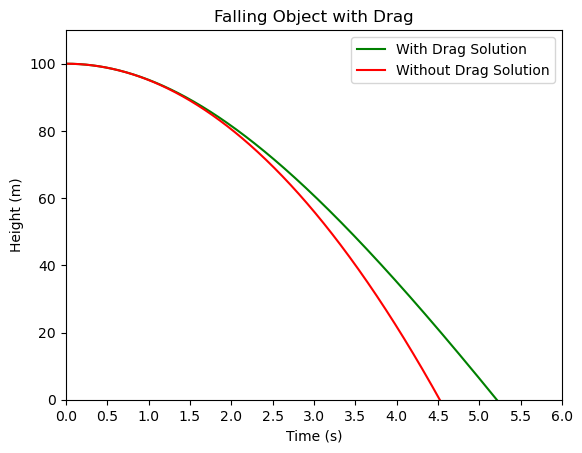

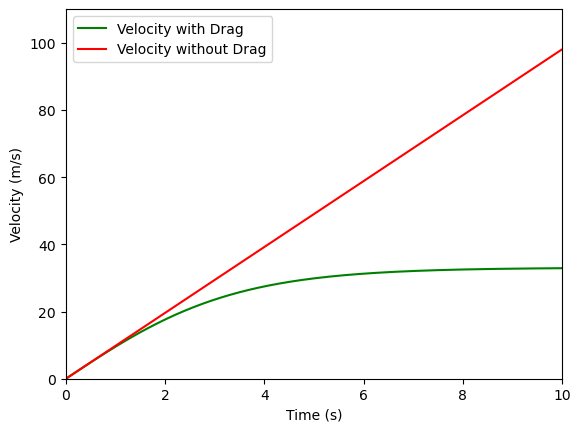

In [98]:
from collections import namedtuple, OrderedDict
Color = namedtuple('RGB','red, green, blue')
colors = {} #dict of colors
class RGB(Color):
    def hex_format(self):
        '''Returns color in hex format'''
        return '#{:02X}{:02X}{:02X}'.format(self.red,self.green,self.blue)
B = RGB(240, 248, 255)
colors['B'] = B  
# Now that the calculations are done, plot the position:
plot(t, x,'g', label = 'With Drag Solution')
plot(t, x1,'r', label = 'Without Drag Solution')
xlabel("Time (s)")
ylabel("Height (m)")
# just for comparison, I will plot the known solution
ax = plt.subplot(1,1,1)
#ax.plot(time, xi + vi*time - 0.5*g*time**2,'b-.', label = 'Analytical Solution')
plt.legend()
ax.set_ylim(0,110)
ax.set_xlim(0,6)
plt.xticks(np.arange(0,6.5,0.5))
plt.title('Falling Object with Drag')
show()
ax = plt.subplot(1,1,1)
#ax.plot(time, xi + vi*time - 0.5*g*time**2,'b-.', label = 'Analytical Solution')
plot(t, abs(v),'g', label = 'Velocity with Drag ')
plot(t, abs(v1),'r', label = 'Velocity without Drag')
xlabel("Time (s)")
ylabel("Velocity (m/s)")
plt.legend()
ax.set_ylim(0,110)
ax.set_xlim(0,10)
show()


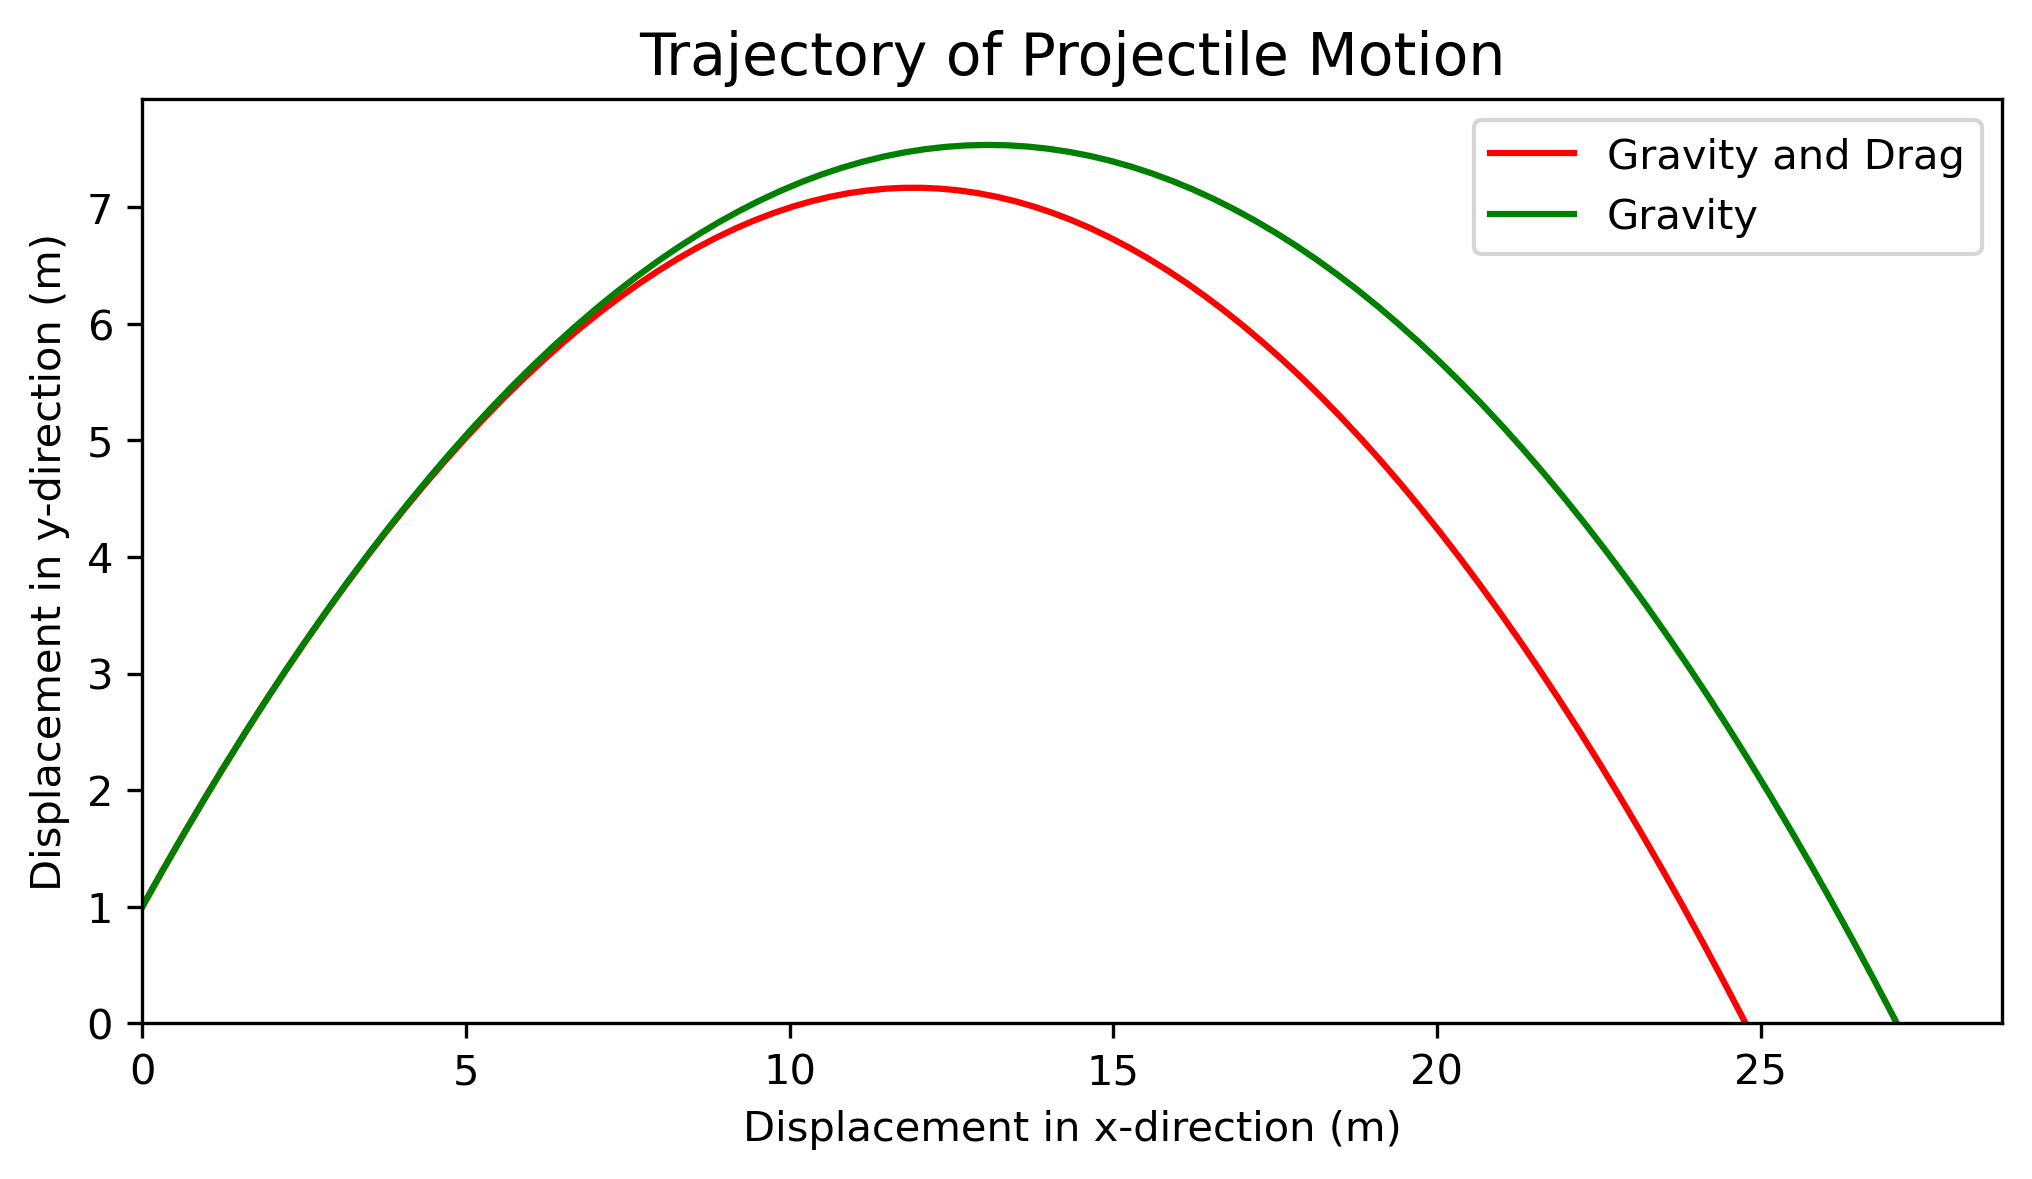

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def projectile(V_initial, theta, bouyancy=True, drag=True):
    g = 9.81
    m = 0.145
    c2 = 0.0013
    C = 0.47
    r = 0.5
    S = np.pi*pow(r, 2)
    ro_mars = 0.0175
    time = np.linspace(0, 100, 10000)
    tof = 0.0
    dt = time[1] - time[0]
    bouy = ro_mars*g*(4/3*np.pi*pow(r, 3))
    gravity = -g * m
    V_ix = V_initial * np.cos(theta)
    V_iy = V_initial * np.sin(theta)
    v_x = V_ix
    v_y = V_iy
    r_x = 0.0
    r_y = 1
    r_xs = list()
    r_ys = list()
    r_xs.append(r_x)
    r_ys.append(r_y)
    # This gets a bit 'hand-wavy' but as dt -> 0 it approaches the analytical solution.
    # Just make sure you use sufficiently small dt (dt is change in time between steps)
    for t in time:
        F_x = 0.0
        F_y = -g
        if (bouyancy == True):
            F_y = F_y + bouy
        if (drag == True):
            F_y = F_y - c2*pow(v_y, 2)
            F_x = F_x - c2*pow(v_x, 2) * np.sign(v_y)
        F_y = F_y + gravity

        r_x = r_x + v_x * dt + (F_x / (2 * m)) * dt**2
        r_y = r_y + v_y * dt + (F_y / (2 * m)) * dt**2
        v_x = v_x + (F_x / m) * dt
        v_y = v_y + (F_y / m) * dt
        if (r_y >= 0.0):
            r_xs.append(r_x)
            r_ys.append(r_y)
        else:
            tof = t
            r_xs.append(r_x)
            r_ys.append(r_y)
            break

    return r_xs, r_ys, tof

v = 45
theta = np.pi/4

fig = plt.figure(figsize=(8,4), dpi=300)
r_xs, r_ys, tof = projectile(v, theta, False, True)
plt.plot(r_xs, r_ys, 'r', label="Gravity and Drag")
r_xs, r_ys, tof = projectile(v, theta, False, False)
plt.plot(r_xs, r_ys, 'g', label="Gravity")
plt.title("Trajectory of Projectile Motion", fontsize=14)
plt.xlabel("Displacement in x-direction (m)")
plt.ylabel("Displacement in y-direction (m)")
plt.ylim(bottom=0.0)
plt.xlim(left=0.0)
plt.legend()
plt.show()


In [9]:
from matplotlib.pyplot import *
from numpy import *
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
g = 9.8     
dt = 0.01    # time step = 1/10 second 
N = 100     # 100 points in the answer array
c2 = 0.0013
m = 0.145 
theta = np.pi/6
t = np.arange(0,10,dt)
x_x = np.zeros(len(t))
x_y = np.zeros(len(t))
V_initial = np.zeros(len(t))
a_x = np.zeros(len(t))
a_y = np.zeros(len(t))
V_ix = V_initial * np.cos(theta)
V_iy = V_initial * np.sin(theta)
v_x = V_ix
v_y = V_iy
x_y[0] = 1
x_x[0] = 0
V_initial[0] = 45
a_y[0] = -g
a_x[0] =0
for i in range(1, len(t)) :
    a_y[i] = -g + (c2/m)*v_y[i-1]**2
    a_x[i] = -g + (c2/m)*v_x[i-1]**2
    v_x[i] = v_x[i-1] + a_x[i-1]*dt
    v_y[i] = v_y[i-1] + a_y[i-1]*dt
    x_x[i] = x_x[i-1]+ v_x[i-1]*dt
    x_y[i] = x_y[i-1]+ v_y[i-1]*dt




Text(0, 0.5, 'Height (m)')

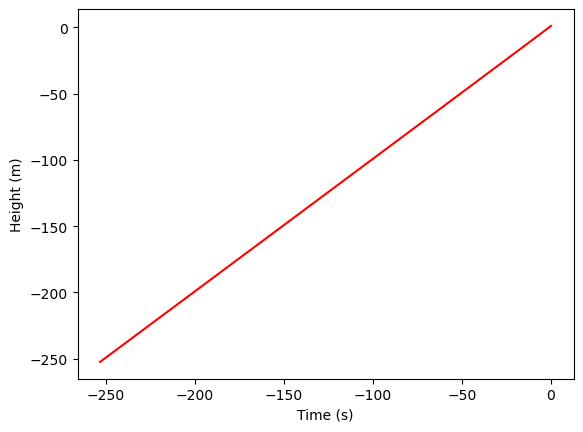

In [11]:
from collections import namedtuple, OrderedDict
Color = namedtuple('RGB','red, green, blue')
colors = {} #dict of colors
class RGB(Color):
    def hex_format(self):
        '''Returns color in hex format'''
        return '#{:02X}{:02X}{:02X}'.format(self.red,self.green,self.blue)
B = RGB(240, 248, 255)
colors['B'] = B  
# Now that the calculations are done, plot the position:
plot(x_x, x_y,'r', label = 'Without Drag Solution')
xlabel("Time (s)")
ylabel("Height (m)")